# Regresión Lineal: Predicción de Precios de Autos

Una tarea bastante común en el contexto de Machine Learning es la predicción de una variable según algunos descriptores. En esta ocasión partiremos de un dataset que involucra ocho variables (algunas numéricas, otras categóricas) y el precio de un automóvil, el cual se desea estimar empleando un modelo de regresión lineal.

El objetivo de este cuaderno es que usted aprenda:
- Algunas maneras de lidiar con descriptores categóricos no-numéricos.
- Uso de la librería Pandas para manejar datos tabulares en formato .csv.
- Uso de la librería Scikit Learn para preprocesamiento y entrenamiento de un modelo de regresión lineal.
- Funcionamiento e implementación del algoritmo Descenso de Gradiente Estocástico para un modelo lineal básico.

Debe completar las celdas vacías y seguir las instrucciones anotadas en el cuaderno.

La fecha límite de entrega es el día **9 de septiembre** y se realizará a través de Bloque Neón.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# Se agregan algunas librerias para mejorar el aspecto de las graficas

plt.style.use('ggplot')

#%matplotlib notebook
%matplotlib inline

In [2]:
df = pd.read_csv('carDataset/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


Podemos observar algunas categorías numéricas, y otras de tipo _object_ (string).

In [4]:
categ = ['model','year','transmission','fuelType','engineSize']
str_categ = ['model','transmission','fuelType']
numer = ['price','mileage','tax','mpg']

## Parte 1

A continuación se realizó el ajuste de los datos para un modelo de regresión lineal definido mediante la librería SciKit-Learn. Se observan dos métricas de precisión, en este caso Error Cuadrático Medio (RMSE) y $R^2$ (puede leer más sobre esta métrica en [ScikitLearn: r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)). Se le entregarán los dos primeros casos como ejemplo, usted debe implementar los demás a partir de estos primeros.

#### Casos:

- Caso 1: Codificación One-Hot (MinMaxScaler)
- Caso 2: Codificación Ordinal (MinMaxScaler)
- Caso 3: Codificación One-Hot (RobustScaler)
- Caso 4: Codificación Ordinal (RobustScaler)
- Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)
- Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)
- Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)

Analice los resultados.

### Caso 1:

#### Codificación One-Hot

Una de las formas de codificar categorías no numéricas se conoce como _one-hot encoding_, en donde se crea una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0.

Igualmente, en este caso se realizará un escalamiento de los datos utilizando un `MinMaxScaler`, investigue más sobre esta función en: [ScikitLearn: MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

## Método de codificación One-Hot

El método de codificación "One-Hot Encoding" es uno de los métodos más comúnmente usados para relacionar variables categóricas en un set de datos con variables numéricas que puedas ser procesadas matemáticamente. 

El método consiste en la generación de una matriz identidad  de $n x n$ dimensiones, donde $n$ corresponde al número de filas o de datos de la variable categórica que se quiere cuantificar o caracterizar. La caracterización se realiza mediante una variable Boleana, uno "1" si se trata de una codificación One-Hot o cero "0" si se trata de una codificación One-Cold.


In [5]:
df_ohe = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.818182,0.256150,0.138100,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.863636,0.256066,0.106716,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.772727,0.222301,0.157479,0.469027,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.863636,0.306839,0.084476,0.265487,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.863636,0.281478,0.208019,0.256637,0.143842,0.444444,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Método de escalamiento MinMaxScaler()

Uno de los principales problemas a la hora de tratar datos son aquellos atípicos muy grandes o pequeños que tienden a sesgar los análisis en comparación de aquellos datos con mayor frecuencia. Para evitar esto se utilizan técnicas que permiten acotar los datos en un rango especifico y posteriormente escalarlos para su tratamiento. 

El método de escalamiento MinMaxScaler() determina el rango de variación de los datos y usa dicho rango para acotar y escalar los datos a analizar de la siguiente manera: 

$$ 
\begin{align}
\tag{1}
    \textbf{Rango} = \textbf{X}_{max} - \textbf{X}_{min} 
\end{align}
$$

Posteriormente se realiza el acotamiento de los datos: 

$$ 
\begin{align}
\tag{1}
    \textbf{X}_{std} = \frac{\textbf{X} - \textbf{X}_{min}}{\textbf{X}_{max} - \textbf{X}_{min}}  
\end{align}
$$

Luego se realiza el escalamiento de cada dato previamente acotado de la siguiente manera:

$$ 
\begin{align}
\tag{1}
    \textbf{X}_{scaled} = \textbf{X}_{std} * \textbf{Rango} - \textbf{X}_{min}  
\end{align}
$$

#### Separación de Datos

In [6]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()

model_1.fit(X_train, y_train)
preds_1 = model_1.predict(X_test)
rmse_1 = np.sqrt(mean_squared_error(y_test, preds_1))
rs_1 = model_1.score(X_test, y_test)
print(f'RMSE: {round(rmse_1,3)}')
print(f'R^2: {round(rs_1,3)}\n')

RMSE: 4142725962.71
R^2: -1.440981226206224e+21



### Caso 2

#### Codificación Ordinal

## Método de codificación OrdinalEncoder()

Al igual que el método de codificación One-Hot o One-Cold, el método de codificación ordinal OrdinalEncoder() sirve para cuantificar variables categóricas (discretas) en números enteros ordinales, a diferencia del método de codificación One-Hot el método ordinal asigna un orden en especifico a los datos a la hora de generar la numeración. 

In [8]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [9]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_2 = LinearRegression()

model_2.fit(X_train, y_train)
preds_2 = model_2.predict(X_test)
rmse_2 = np.sqrt(mean_squared_error(y_test, preds_2))
rs_2 = model_2.score(X_test, y_test)
print(f'RMSE: {round(rmse_2,3)}')
print(f'R^2: {round(rs_2,3)}\n')

RMSE: 0.05
R^2: 0.787



### Caso 3

#### Codificación One-Hot

In [11]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)
df_scl_ohe.head()

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.5,0.776286,0.257936,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.775541,0.004718,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,0.477703,0.414289,0.896552,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.223415,-0.174718,0.103448,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.999702,0.822056,0.068966,-1.955882,0.625,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Método de escalamiento RobustScaler()

El método de escalamiento robusto de datos permite minimizar el efecto negativo del análisis de regresión provocado por los valores atípicos marginales de los datos, a diferencia del método de escalamiento MinMaxScaler() usado previamente el método RobustScaler() usa los valores de la mediana y los cuartiles de los datos con lo cual se minimiza efecto de los valores atípicos de menor frecuencia en el análisis como se muestra en la siguiente expresión.

$$ 
\begin{align}
\tag{1}
    \textbf{X}_{new} = \frac{\textbf{X} - \textbf{X}_{median}}{\textbf{IQR}}  
\end{align}
$$

#### Separación de Datos

In [12]:
X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_3 = LinearRegression()

model_3.fit(X_train, y_train)
preds_3 = model_3.predict(X_test)
rmse_3 = np.sqrt(mean_squared_error(y_test, preds_3))
rs_3 = model_3.score(X_test, y_test)
print(f'RMSE: {round(rmse_3,3)}')
print(f'R^2: {round(rs_3,3)}\n')

RMSE: 2067967397.868
R^2: -4.61460761036326e+18



### Caso 4

#### Codificación Ordinal

In [14]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.066667,-0.5,0.776286,0.0,0.257936,0.0,0.896552,-1.955882,0.625
1,0.066667,0.0,0.775541,0.0,0.004718,0.0,0.068966,-1.955882,0.625
2,0.066667,-1.0,0.477703,0.0,0.414289,0.0,0.896552,-1.955882,0.625
3,0.066667,0.0,1.223415,0.0,-0.174718,0.0,0.103448,-1.955882,0.625
4,0.066667,0.0,0.999702,0.0,0.822056,0.0,0.068966,-1.955882,0.625


#### Separación de Datos

In [15]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_4 = LinearRegression()

model_4.fit(X_train, y_train)
preds_4 = model_4.predict(X_test)
rmse_4 = np.sqrt(mean_squared_error(y_test, preds_4))
rs_4 = model_4.score(X_test, y_test)
print(f'RMSE: {round(rmse_4,3)}')
print(f'R^2: {round(rs_4,3)}\n')

RMSE: 0.444
R^2: 0.787



### Caso 5

#### Codificación Ordinal

In [17]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [18]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.3, random_state=22)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_5 = LinearRegression()

model_5.fit(X_train, y_train)
preds_5 = model_5.predict(X_test)
rmse_5 = np.sqrt(mean_squared_error(y_test, preds_5))
rs_5 = model_5.score(X_test, y_test)
print(f'RMSE: {round(rmse_5,3)}')
print(f'R^2: {round(rs_5,3)}\n')

RMSE: 0.051
R^2: 0.786



### Caso 6

#### Codificación Ordinal

In [20]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [21]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.55, random_state=22)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_6 = LinearRegression()

model_6.fit(X_train, y_train)
preds_6 = model_6.predict(X_test)
rmse_6 = np.sqrt(mean_squared_error(y_test, preds_6))
rs_6 = model_6.score(X_test, y_test)
print(f'RMSE: {round(rmse_6,3)}')
print(f'R^2: {round(rs_6,3)}\n')

RMSE: 0.05
R^2: 0.789



### Caso 7

#### Codificación Ordinal

In [23]:
oe = OrdinalEncoder()
df_oe = df.copy()
df_oe[str_categ] = oe.fit_transform(df_oe[str_categ])

x = df_oe.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scl_oe = pd.DataFrame(x_scaled, columns=df_oe.columns)
df_scl_oe.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0.352941,0.818182,0.256150,0.333333,0.138100,1.0,0.469027,0.143842,0.444444
1,0.352941,0.863636,0.256066,0.333333,0.106716,1.0,0.256637,0.143842,0.444444
2,0.352941,0.772727,0.222301,0.333333,0.157479,1.0,0.469027,0.143842,0.444444
3,0.352941,0.863636,0.306839,0.333333,0.084476,1.0,0.265487,0.143842,0.444444
4,0.352941,0.863636,0.281478,0.333333,0.208019,1.0,0.256637,0.143842,0.444444


#### Separación de Datos

In [24]:
X = df_scl_oe.drop(['price'], axis=1)
y = df_scl_oe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=22)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model_7 = LinearRegression()

model_7.fit(X_train, y_train)
preds_7 = model_7.predict(X_test)
rmse_7 = np.sqrt(mean_squared_error(y_test, preds_7))
rs_7 = model_7.score(X_test, y_test)
print(f'RMSE: {round(rmse_7,3)}')
print(f'R^2: {round(rs_7,3)}\n')

RMSE: 0.05
R^2: 0.787



## Análisis de Resultados


Luego de evaluar los diferentes casos de regresión lineal y determinar para cada caso los resultados de los coeficientes de regresión $RMSE$ y $R^2$ , se observa la influencia que tiene el método de codificación usado con los resultados obtenidos del coeficiente de regresión $RMSE$, este coeficiente representa la dispersión de los datos con la característica de predicción obtenida en el proceso de regresión, por consiguiente entre mas pequeño sea este valor es posible afirmar que el modelo de regresión se ajusta de mejor manera a los datos analizados.

$$ 
\begin{align}
\tag{1}
    \textbf{RMSE} = \sqrt{\Big(\frac{1}{n}\Big)*\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}}  
\end{align}
$$

El otro coeficiente analizado corresponde al coeficiente $R^2$ este parámetro al igual que el coeficiente $RMSE$ sirve para evaluar el modelo de regresión aplicado a los datos, sin embargo el coeficiente $R^2$ se centra mas en la evaluación del ajuste de los datos con los pronosticados en el modelo de regresión que de la evaluación del modelo de regresión en sí. Esto quiere decir que obtener valores satisfactorios de un $R^2$ para un set de datos acotados no necesariamente garantiza que el modelo de regresión se ajusta a todos los datos pronosticados por el modelo.  Generalmente los valores de $R^2$ varia en un rango de 0 a 1 donde a mayor valor se puede decir que los datos pronosticados por el modelo de regresión se ajustan a los datos evaluados sin inferir mucho sobre el modelo de regresión en sí. 

$$ 
\begin{align}
\tag{1}
    \textbf{$R^2$} = 1 - \frac{\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i} - \bar{y}_{i})^{2}}  
\end{align}
$$

In [26]:
tabla = pd.DataFrame(data = [['1','Caso 1: Codificación One-Hot (MinMaxScaler)','0.031','0.917'], ['2','Caso 2: Codificación Ordinal (MinMaxScaler)','0.05','0.787'],['3','Caso 3: Codificación One-Hot (RobustScaler)','0.277','0.917'],['4','Caso 4: Codificación Ordinal (RobustScaler)','0.444','0.787'],['5','Caso 5: Entrenar con un 30% (Codificación Ordinal, MinMaxScaler)','0.051','0.786'],['6','Caso 6: Entrenar con un 55% (Codificación Ordinal, MinMaxScaler)','0.05','0.789'],['7','Caso 7: Entrenar con un 80% (Codificación Ordinal, MinMaxScaler)','0.051','0.786']], columns = ['Caso','Descripción','RMSE','R^2'])

tabla

,Caso,Descripción,RMSE,R^2
0,1,Caso 1: Codificación One-Hot (MinMaxScaler),0.031,0.917
1,2,Caso 2: Codificación Ordinal (MinMaxScaler),0.05,0.787
2,3,Caso 3: Codificación One-Hot (RobustScaler),0.277,0.917
3,4,Caso 4: Codificación Ordinal (RobustScaler),0.444,0.787
4,5,Caso 5: Entrenar con un 30% (Codificación Ordi...,0.051,0.786
5,6,Caso 6: Entrenar con un 55% (Codificación Ordi...,0.05,0.789
6,7,Caso 7: Entrenar con un 80% (Codificación Ordi...,0.051,0.786


Como se observa en la tabla anterior al comparar los resultados de los coeficientes de regresión es posible inferir que al realizar una codificación One-Hot y un escalamiento MaxMin de los datos se obtiene un mejor ajuste de los datos pronosticados conforme el modelo de regresión lineal aplicado. 

Tambien es posible observar que el coeficiente $RMSE$ es mas suceptible al metodo de escalamiento aplicado a los datos así como el coeficiente $R^2$ es mas suceptible al metodo de codificación aplicado a la hora de numerar las variables categoricas. 

En cuanto a los casos en los que se varía la tasa de entrenamiento del modelo se observan mejores resultados al utilizar una tasa de entrenamiento cercana al 50% que al usar valores por debajo o por encima de este rango.

## Parte 2

Ahora usted debe desarrollar su propia implementación del método Descenso de Gradiente estocástico. Para esta ocasión debe utilizar una codificación One-Hot, un RobustScaler y realizar el entrenamiento a partir del 80% de los datos. Al final del entrenamiento, en la lista `errores` se deben tener los valores de la función de error para cada iteración y así poder observar el progreso gráficamente.

In [27]:
df_ohe = pd.get_dummies(df)
scaler = RobustScaler()
df_scl_ohe = scaler.fit_transform(df_ohe)
df_scl_ohe = pd.DataFrame(df_scl_ohe, columns = df_ohe.columns)

X = df_scl_ohe.drop(['price'], axis=1)
y = df_scl_ohe['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

## Análisis de Descenso de Gradiente Estocástico (S.G.D)

El algoritmo de **Descenso de Gradiente Estocástico** es una modificación del algoritmo de optimización Descenso de Gradiente. Estos dos difieren únicamente en el computo del gradiente de la función de error en cada iteración: mientras que el primero únicamente utiliza un dato para ello, descenso de gradiente utiliza todos los datos. En otras palabras, la versión estócastica de descenso gradiente halla un *estimado* del gradiente de la función de error en cada iteración *(véase ecuación 1 y ecuación 2)*. 

$$ 
\begin{align}
\tag{1}
    \nabla_w E = \sum_{i = 0}^{n} (\textbf{w}^T\textbf{x}_i - \textbf{y}_i)\textbf{x}_i  
\end{align}
$$

$$ 
\begin{align}
\tag{2}
    \nabla_w E \approx (\textbf{w}^T\textbf{x}_i - \textbf{y}_i)\textbf{x}_i  
\end{align}
$$

Ahora bien, lo que 'pierde' en precisión el algoritmo de descenso de gradiente estocástico, con respecto a su versión original, lo gana en tiempo de computo. Esto último, se debe a que requiere realizar únicamente una operación para hallar el estimado del gradiente, utilizando un solo par de datos $(x_i, y_i)$ mientras que descenso de gradiente requiere todo el conjunto de *n* pares de datos para hallar el gradiente. 

Por otro lado, debido a que la versión estocástica halla es un estimado del gradiente, en cada iteración su comportamiento es aleatorio, i.e. no necesariamente se acerca al mínimo global en una iteración. Es decir, debido a que la función de error es una función *cuadrática semi-positiva* y por ende, una *función convexa* tiene un único mínimo globlal (donde la dirección de máximo descenso es precisamente el gradiente) se espera que en cada iteración del algoritmo, se acerque al mínimo. Esto último, no se observa en cada iteración de descenso de gradiente estocástico debido a que, nuevamente, es un estimado del gradiente y dependiente, en un mayor grado, del par de datos $(x_i, y_i)$ elegidos. Por ende, en una iteración de descenso de gradiente es posible que el error aumente y no dismunya. Sin embargo, el comportamiento, o tendencia, general del algoritmo es de descenso hacia el mínimo.  

### Elección de la tasa de aprendizaje ($\eta$)

La tasa de aprendizaje es un parámetro del algoritmo de descenso de gradiente estocástico que establece, en terminos generales, el **tamaño del paso** que uno da hacia el mínimo global de la función de error *E* en cada iteración. Es importante aclarar, que el paso puede ser constante para todas la iteraciones del algoritmo o puede variar. En la presente implementación del algoritmo de descenso de gradiente se elegió mantenar a la tasa de aprendizaje constante. Sin embargo, para elegir el tamaño de paso que mejor se desempeña, se implementó el algoritmo para cinco tamaños, equidistantes, entre $0.0001$ y $0.1$ *(véase ecuación 3)*. 
            
$$ 
\begin{align}
\tag{3}
    \eta =  [0.0001, 0.025075, 0.05005,0.075025, 0.1]
\end{align}
$$ 

El desemepeño de las tasas de aprendizaje a considerar se evaluará observando la curva de error vs. el número de iteraciones, donde la mejor tasa de aprendizaje correspondería a aquella tasa que requerió de un menor número de iteraciones para llegar al mínimo global de la función de error.


### Criterio de parada

El criterio de parada del algoritmo de descenso de gradiente estocástico a implementar es que la **magnitud del gradiente** de la función de error sea un valor, $\epsilon$, cercano a 0 *(véase ecuación 4)*. Se utilizó este criterio de parada debido a que en el mínimo global de la función de error, o de cualquier función, el gradiente es 0. Por ende, al hallar la magnitud el gradiente en cada iteración, se puede llegar a conocer si el algoritmo de descenso de gradiente estocástico llegó al mínimo global si la condición mencionada anteriormente se cumple. En este caso, el valor de $\epsilon$ elegido fue de $1e[-5]$.

$$ 
\begin{align}
\tag{4}
    |\nabla_w E|  \leq \epsilon
\end{align}
$$

Por otro lado, si el algoritmo tarda más de **5000 iteraciones** para que la condición contemplada se cumpla, el algoritmo se termina al llegar a la iteración número 5000.


## Implementación de S.G.D

A continuación se muestra la implementación de Descenso de Gradiente Estocástico. Es importante aclarar, que la selección del par de datos $(x_i, y_i)$ se realizó de manera aleatoria utilizando el modulo `random` de numpy. Adicionalmente, la selección del par de datos es *con reemplazo*. Es decir, si un par es elegido en una iteración, puede volver a ser seleccionado en una iteración posterior. Finalmente, es importante mencionar que para realizar la implementación del algoritmo con una tasa de aprendizaje distinta es necesario modificar la siguiente linea de código: 

`tasa = tasas_aprendizaje[i]`, donde `tasas_aprendizaje` hace referencia al vector de tasas consideradas *(véase ecuación 3)* y el término `i` a la posición de dicho vector.

In [28]:
np.random.seed(20) #Se implementa una semilla con el fin de obtener los mismos resultados al correr el algoritmo 
                   # múltiples veces #

X_train_array = np.c_[np.ones(X_train.values.shape[0]), X_train.values]
y_train_array = y_train.values
X_test_array = np.c_[np.ones(X_test.values.shape[0]), X_test.values]
y_test_array = y_test.values

#INICIALIZACIÓN de W
w0 = np.zeros(X_train_array.shape[1])# Inicializar aleatoriamente #
w = w0.copy()

#SELECCIÓN de PAR (Xi, Yi) aleatorio
i = np.random.randint(0, X_train_array.shape[0]) # Posición aleatoria #
xActual = X_train_array[i]
yActual = y_train_array[i]

#INICIALIZACIÓN del CRITERIO DE PARADA
eps = 1e-5 # Se define un criterio de parada basado en el error en la predicción #
error = float('inf') # Valor inicial, se debe actualizar en cada iteración #
mag_grad = float('inf') 

#INICIALIZACIÓN de la TASA DE APRENDIZAJE
 # Selección de tasa de aprendizaje #
tasas_aprendizaje = np.linspace(0.0001, 0.1, 5)
tasa = tasas_aprendizaje[1]
errores = [] #Lista para monitorear aprendizaje #
                           # Agregar a esta lista los valores de la función de error en cada iteración #

#Ciclo iterativo según algoritmo de descenso de gradiente
num_iteraciones = 0
while np.linalg.norm(mag_grad) > eps:
    # Desarrollo de algoritmo #
    g = np.dot(w, xActual)
    error = g - yActual
    mag_grad = error * xActual
    w = w - tasa * mag_grad
        
    errores.append(error)
        
    i = np.random.randint(0, X_train.values.shape[0])
    xActual = X_train_array[i]
    yActual = y_train_array[i]  
    
    num_iteraciones += 1
    if num_iteraciones > 5000: break

## Evaluación del modelo

A continuación se muestran los resultados al utilizar el vector de párametros, `w`, estimado utilizando descenso de gradiente escástico, para predecir con el modelo el precio de un vehículo con ciertas características, `y`. 

In [29]:
y_train_preds = np.zeros(y_train_array.shape)
for i in range(X_train_array.shape[0]):
    y_train_preds[i] = np.dot(w,X_train_array[i])

y_test_preds = np.zeros(y_test_array.shape)
for i in range(X_test_array.shape[0]):
    y_test_preds[i] = np.dot(w,X_test_array[i])
    
r2_train = r2_score(y_train_array, y_train_preds)
r2_test = r2_score(y_test_array, y_test_preds)
print(f'R2 entrenamiento: {round(r2_train,4)}\nR2 prueba: {round(r2_test,4)}')

R2 entrenamiento: 0.8923
R2 prueba: 0.8904


El desempeño del modelo de regresión lineal obtenido, se midió a través de la métrica de precisión $R^2$. El valor mostrado anteriormente corresponde al mejor desempeño obtenido con una tasa de aprendizaje de $0.025075$. Sin embargo, la tabla mostrada a continuación evidencia el desempeño de las 5 tasas de aprendizaje consideradas y el número de iteraciones de S.G.D requeridas para cumplir con el criterio de parada. 

| Tasa de Aprendizaje ($\eta$)| $R^2$ | Iteraciones |
|:-------------------:|:--------------:|:-----------:|
|        0.0001       |      0.476     |     5000    |
|       0.025075      |     0.8904     |     5000    |
|       0.05005       |      0.89      |     5000    |
|       0.075025      |     0.8664     |     5000    |
|         0.1         |      0.853     |     5000    |


Como se puede observar en ella, el criterio de parada del algoritmo S.G.D fue el número de iteraciones. Es decir, llegó al número máximo de iteraciones permitidas y por ende, el criterio que estable que la magnitud del gradiente debe ser un valor, $\epsilon$, lo suficientemente cercano a 0 no se cumplió para ninguna de las tasas de aprendizaje consideradas. Esto se debe a que en este caso partícular el S.G.D requiere más de 5000 iteraciones para que lo anterior se cumpla. Sin embargo, para la mayoría de los casos el modelo (exceptuando la tasa de aprendizaje de 0.0001) se desempeña satisfactoriamente y por ende, el algoritmo de S.G.D se acercó bastante al mínimo global de la función de error. Es decir, la magnitud del gradiente obtenido fue un número cercano a 0. 

## Gráfica de Resultados

A continuación se muestra la el comportamiento del error en cada iteración para la tasa de aprendizaje con la cual se obtuvo el mejor desempeño. 

Text(0.5, 1.0, 'Descenso de Gradiente Estocástico ($\\eta$ = 0.025075)')

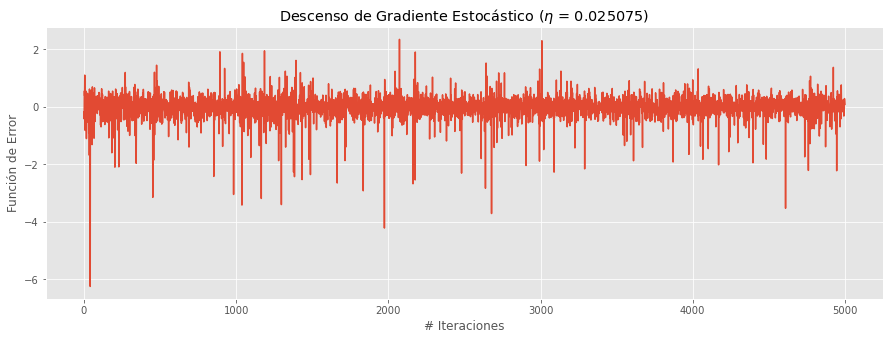

In [30]:
plt.figure(figsize=(15,5))
plt.plot(errores)
plt.xlabel('# Iteraciones')
plt.ylabel('Función de Error')
plt.title('Descenso de Gradiente Estocástico ($\eta$ = 0.025075)')

Como se puede observar en ella, el comportamiento del error es aleatorio. Es decir, en algunas iteraciones el error aumenta, mientras que en otras iteraciones el error disminuye. Esto último, como fue mencionado anteriormente, se debe a que en cada iteración se esta hallando un estimado del gradiente que depende de gran medida del par $(x_i, y_i)$ seleccionado en cada iteración. Sin embargo, en general, y como era de esperarse, el error oscila en alrededor de 0 debido a que el gradiente es la dirección de máximo descenso para la función de error cuadrática.